# Importing libraries & data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")
sns.set()

### Analysing Summer editions data
In this analysis, the Summer Olympics dataset has been cleaned by:
- Replacing missing values with the mean value.
- Filling missing player names using the forward fill method.

### Analysing Summer and Winter editions data
In this analysis, both the Summer and Winter Olympics datasets have been analyzed by:
- Visualizing the top 10 countries in terms of medals and sports.
- Analyzing the distribution of medals by gender.


In [2]:
df_winter=pd.read_csv("E:/Data Science/Porject of Analysis/Datasets olympaic/winter.csv")
df_winter

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1924,Chamonix,Biathlon,Biathlon,"BERTHET, G.",FRA,Men,Military Patrol,Bronze
1,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, C.",FRA,Men,Military Patrol,Bronze
2,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, Maurice",FRA,Men,Military Patrol,Bronze
3,1924,Chamonix,Biathlon,Biathlon,"VANDELLE, André",FRA,Men,Military Patrol,Bronze
4,1924,Chamonix,Biathlon,Biathlon,"AUFDENBLATTEN, Adolf",SUI,Men,Military Patrol,Gold
...,...,...,...,...,...,...,...,...,...
5765,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze
5766,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold
5767,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver
5768,2014,Sochi,Skiing,Snowboard,"SAMKOVA, Eva",CZE,Women,Snowboard Cross,Gold


In [3]:
df_winter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5770 entries, 0 to 5769
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        5770 non-null   int64 
 1   City        5770 non-null   object
 2   Sport       5770 non-null   object
 3   Discipline  5770 non-null   object
 4   Athlete     5770 non-null   object
 5   Country     5770 non-null   object
 6   Gender      5770 non-null   object
 7   Event       5770 non-null   object
 8   Medal       5770 non-null   object
dtypes: int64(1), object(8)
memory usage: 405.8+ KB


In [4]:
df_winter['Athlete'] = df_winter['Athlete'].str.split(', ').str[::-1].str.join(' ')
df_winter['Athlete'] = df_winter['Athlete'].str.title()
df_winter.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1924,Chamonix,Biathlon,Biathlon,G. Berthet,FRA,Men,Military Patrol,Bronze
1,1924,Chamonix,Biathlon,Biathlon,C. Mandrillon,FRA,Men,Military Patrol,Bronze
2,1924,Chamonix,Biathlon,Biathlon,Maurice Mandrillon,FRA,Men,Military Patrol,Bronze
3,1924,Chamonix,Biathlon,Biathlon,André Vandelle,FRA,Men,Military Patrol,Bronze
4,1924,Chamonix,Biathlon,Biathlon,Adolf Aufdenblatten,SUI,Men,Military Patrol,Gold


In [5]:
Gender_Medal=df_winter.groupby("Gender")['Medal'].value_counts().reset_index()
Gender_Medal

,Gender,Medal,count
0,Men,Silver,1319
1,Men,Bronze,1315
2,Men,Gold,1310
3,Women,Gold,611
4,Women,Silver,611
5,Women,Bronze,604


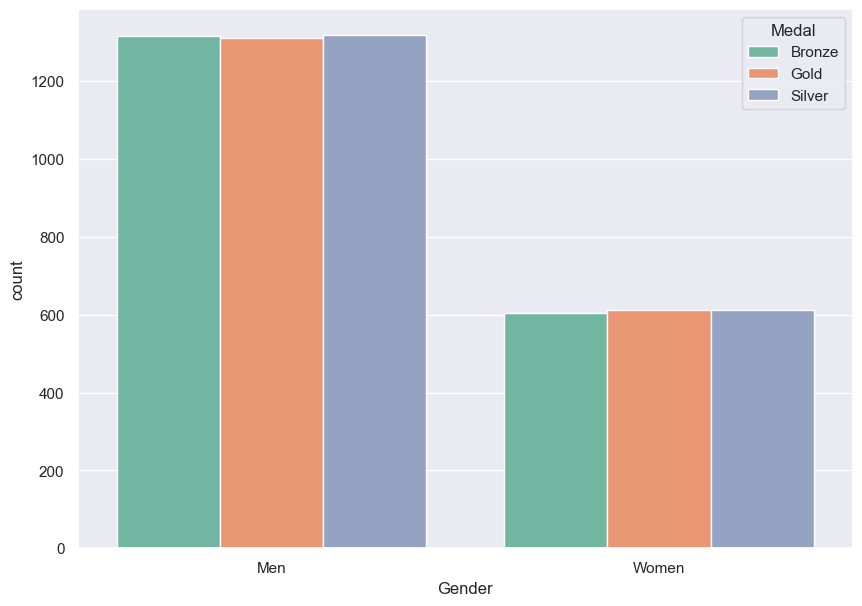

In [6]:
plt.figure(figsize=(10, 7))
sns.countplot(data=df_winter, x='Gender', hue='Medal', palette='Set2')
plt.show()

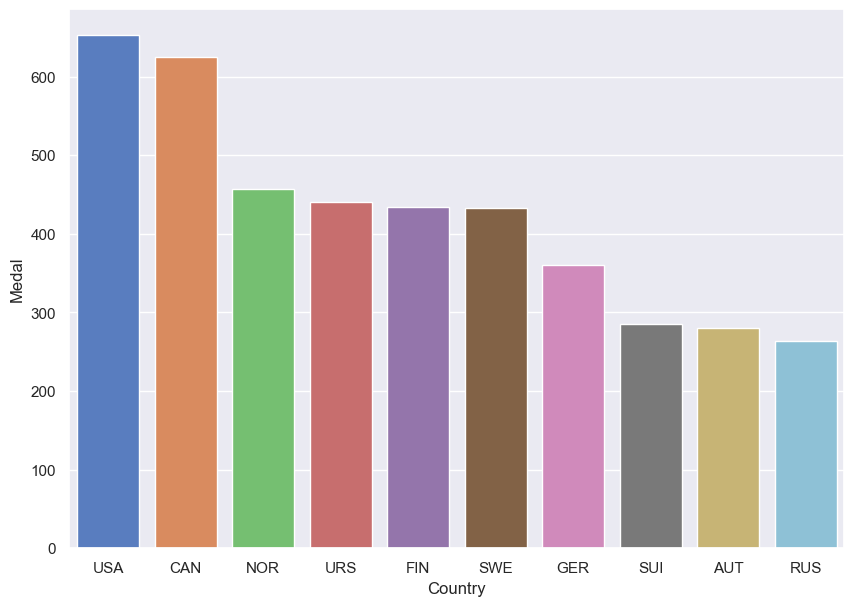

In [7]:
plt.figure(figsize=(10, 7))
Top_Medal=df_winter.groupby('Country')['Medal'].count().nlargest(10).reset_index()
sns.barplot(x='Country', y='Medal', hue='Country', data=Top_Medal, palette='muted')
plt.show()

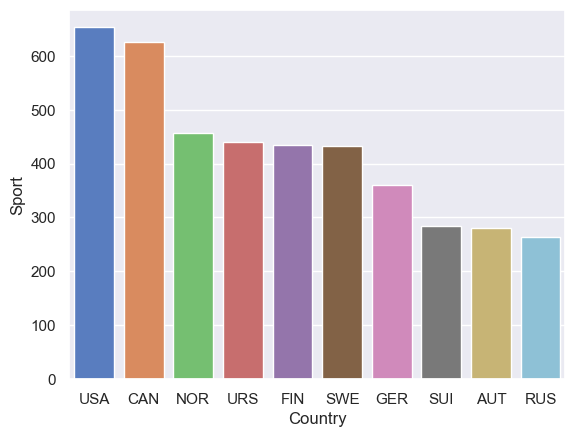

In [8]:
Top_Sport=df_winter.groupby('Country')['Sport'].count().nlargest(10).reset_index()
sns.barplot(x='Country', y='Sport', hue='Country', data=Top_Sport, palette='muted')
plt.show()

In [9]:
df_summer=pd.read_csv("E:/Data Science/Porject of Analysis/Datasets olympaic/summer.csv")
df_summer.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [10]:
df_summer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31165 entries, 0 to 31164
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        31165 non-null  int64 
 1   City        31165 non-null  object
 2   Sport       31165 non-null  object
 3   Discipline  31165 non-null  object
 4   Athlete     31165 non-null  object
 5   Country     31161 non-null  object
 6   Gender      31165 non-null  object
 7   Event       31165 non-null  object
 8   Medal       31165 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


In [11]:
df_summer.isna().sum()

Year          0
City          0
Sport         0
Discipline    0
Athlete       0
Country       4
Gender        0
Event         0
Medal         0
dtype: int64

In [12]:
df_summer[df_summer['Country'].isna()]

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
29603,2012,London,Athletics,Athletics,Pending,NaN,Women,1500M,Gold
31072,2012,London,Weightlifting,Weightlifting,Pending,NaN,Women,63KG,Gold
31091,2012,London,Weightlifting,Weightlifting,Pending,NaN,Men,94KG,Silver
31110,2012,London,Wrestling,Wrestling Freestyle,"KUDUKHOV, Besik",NaN,Men,Wf 60 KG,Silver


In [13]:
df_summer['Country'].fillna(method='ffill', inplace=True)
df_summer.isna().sum()

Year          0
City          0
Sport         0
Discipline    0
Athlete       0
Country       0
Gender        0
Event         0
Medal         0
dtype: int64

In [14]:
df_summer['Athlete'] = df_summer['Athlete'].str.split(', ').str[::-1].str.join(' ')
df_summer['Athlete'] = df_summer['Athlete'].str.title()
df_summer.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,Alfred Hajos,HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,Otto Herschmann,AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,Dimitrios Drivas,GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,Ioannis Malokinis,GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,Spiridon Chasapis,GRE,Men,100M Freestyle For Sailors,Silver


In [15]:
Gender_Medal=df_summer.groupby("Gender")['Medal'].value_counts().reset_index()
Gender_Medal

,Gender,Medal,count
0,Men,Gold,7698
1,Men,Bronze,7539
2,Men,Silver,7509
3,Women,Bronze,2830
4,Women,Silver,2801
5,Women,Gold,2788


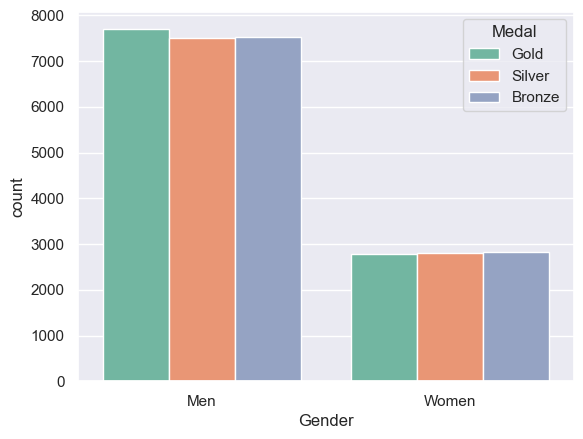

In [16]:
sns.countplot(data=df_summer, x='Gender', hue='Medal', palette='Set2')
plt.show()

In [17]:
df_dictionary=pd.read_csv("E:/Data Science/Porject of Analysis/Datasets olympaic/dictionary.csv")
df_dictionary

,Country,Code,Population,GDP per Capita
0,Afghanistan,AFG,32526562.0,594.323081
1,Albania,ALB,2889167.0,3945.217582
2,Algeria,ALG,39666519.0,4206.031232
3,American Samoa*,ASA,55538.0,NaN
4,Andorra,AND,70473.0,NaN
...,...,...,...,...
196,Vietnam,VIE,91703800.0,2111.138024
197,Virgin Islands*,ISV,103574.0,NaN
198,Yemen,YEM,26832215.0,1406.291651
199,Zambia,ZAM,16211767.0,1304.879014


In [18]:
df_dictionary.isna().sum()

Country            0
Code               0
Population         5
GDP per Capita    25
dtype: int64

In [19]:
df_dictionary['Population'].fillna(df_dictionary['Population'].mean(),inplace=True)

In [20]:
df_dictionary.loc[:, 'GDP per Capita'] = df_dictionary['GDP per Capita'].fillna(df_dictionary['GDP per Capita'].mean())

In [21]:
df_dictionary.isna().sum()

Country           0
Code              0
Population        0
GDP per Capita    0
dtype: int64

### Data Collection and Cleaning in Olympic Data

#### 1. Data Merging
- Added **Season** column to both summer and winter datasets:

  ```python
  df_summer['Season'] = 'Summer'
  df_winter['Season'] = 'Winter'
  ```
- Merged the summer and winter datasets into one DataFrame using **pd.concat()**.

#### 2. Column Renaming
- Renamed the **Country_x** column to **Country** to maintain consistency.

#### 3. Missing Values Detection
- Displayed DataFrame information using **df.info()** to check for missing values.
- Visualized missing values using **Heatmap** from Seaborn.

#### 4. Handling Missing Values
- Filled missing values in the **Population** column with the **Mean**.
- Filled missing values in the **GDP per Capita** column with the **Mean**.

#### 5. Data Validation
- Rechecked DataFrame information to ensure missing values were properly handled.



In [22]:
df_summer['Season'] = 'Summer'
df_winter['Season'] = 'Winter'


In [23]:
olympic_df = pd.concat([df_summer, df_winter], ignore_index=True)
olympic_df

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal,Season
0,1896,Athens,Aquatics,Swimming,Alfred Hajos,HUN,Men,100M Freestyle,Gold,Summer
1,1896,Athens,Aquatics,Swimming,Otto Herschmann,AUT,Men,100M Freestyle,Silver,Summer
2,1896,Athens,Aquatics,Swimming,Dimitrios Drivas,GRE,Men,100M Freestyle For Sailors,Bronze,Summer
3,1896,Athens,Aquatics,Swimming,Ioannis Malokinis,GRE,Men,100M Freestyle For Sailors,Gold,Summer
4,1896,Athens,Aquatics,Swimming,Spiridon Chasapis,GRE,Men,100M Freestyle For Sailors,Silver,Summer
...,...,...,...,...,...,...,...,...,...,...
36930,2014,Sochi,Skiing,Snowboard,Jenny Jones,GBR,Women,Slopestyle,Bronze,Winter
36931,2014,Sochi,Skiing,Snowboard,Jamie Anderson,USA,Women,Slopestyle,Gold,Winter
36932,2014,Sochi,Skiing,Snowboard,Dominique Maltais,CAN,Women,Snowboard Cross,Silver,Winter
36933,2014,Sochi,Skiing,Snowboard,Eva Samkova,CZE,Women,Snowboard Cross,Gold,Winter


In [24]:
df_olympic = pd.merge(olympic_df, df_dictionary, how='left', left_on='Country', right_on='Code')
df_olympic

,Year,City,Sport,Discipline,Athlete,Country_x,Gender,Event,Medal,Season,Country_y,Code,Population,GDP per Capita
0,1896,Athens,Aquatics,Swimming,Alfred Hajos,HUN,Men,100M Freestyle,Gold,Summer,Hungary,HUN,9844686.0,12363.543460
1,1896,Athens,Aquatics,Swimming,Otto Herschmann,AUT,Men,100M Freestyle,Silver,Summer,Austria,AUT,8611088.0,43774.985174
2,1896,Athens,Aquatics,Swimming,Dimitrios Drivas,GRE,Men,100M Freestyle For Sailors,Bronze,Summer,Greece,GRE,10823732.0,18002.230578
3,1896,Athens,Aquatics,Swimming,Ioannis Malokinis,GRE,Men,100M Freestyle For Sailors,Gold,Summer,Greece,GRE,10823732.0,18002.230578
4,1896,Athens,Aquatics,Swimming,Spiridon Chasapis,GRE,Men,100M Freestyle For Sailors,Silver,Summer,Greece,GRE,10823732.0,18002.230578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36930,2014,Sochi,Skiing,Snowboard,Jenny Jones,GBR,Women,Slopestyle,Bronze,Winter,United Kingdom,GBR,65138232.0,43875.969614
36931,2014,Sochi,Skiing,Snowboard,Jamie Anderson,USA,Women,Slopestyle,Gold,Winter,United States,USA,321418820.0,56115.718426
36932,2014,Sochi,Skiing,Snowboard,Dominique Maltais,CAN,Women,Snowboard Cross,Silver,Winter,Canada,CAN,35851774.0,43248.529909
36933,2014,Sochi,Skiing,Snowboard,Eva Samkova,CZE,Women,Snowboard Cross,Gold,Winter,Czech Republic,CZE,10551219.0,17548.338213


In [25]:
df_olympic.drop(columns=['Country_y','Code'], inplace=True)
df_olympic

,Year,City,Sport,Discipline,Athlete,Country_x,Gender,Event,Medal,Season,Population,GDP per Capita
0,1896,Athens,Aquatics,Swimming,Alfred Hajos,HUN,Men,100M Freestyle,Gold,Summer,9844686.0,12363.543460
1,1896,Athens,Aquatics,Swimming,Otto Herschmann,AUT,Men,100M Freestyle,Silver,Summer,8611088.0,43774.985174
2,1896,Athens,Aquatics,Swimming,Dimitrios Drivas,GRE,Men,100M Freestyle For Sailors,Bronze,Summer,10823732.0,18002.230578
3,1896,Athens,Aquatics,Swimming,Ioannis Malokinis,GRE,Men,100M Freestyle For Sailors,Gold,Summer,10823732.0,18002.230578
4,1896,Athens,Aquatics,Swimming,Spiridon Chasapis,GRE,Men,100M Freestyle For Sailors,Silver,Summer,10823732.0,18002.230578
...,...,...,...,...,...,...,...,...,...,...,...,...
36930,2014,Sochi,Skiing,Snowboard,Jenny Jones,GBR,Women,Slopestyle,Bronze,Winter,65138232.0,43875.969614
36931,2014,Sochi,Skiing,Snowboard,Jamie Anderson,USA,Women,Slopestyle,Gold,Winter,321418820.0,56115.718426
36932,2014,Sochi,Skiing,Snowboard,Dominique Maltais,CAN,Women,Snowboard Cross,Silver,Winter,35851774.0,43248.529909
36933,2014,Sochi,Skiing,Snowboard,Eva Samkova,CZE,Women,Snowboard Cross,Gold,Winter,10551219.0,17548.338213


In [26]:
df_olympic.rename(columns={'Country_x':'Country'},inplace=True)

In [27]:
df_olympic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36935 entries, 0 to 36934
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            36935 non-null  int64  
 1   City            36935 non-null  object 
 2   Sport           36935 non-null  object 
 3   Discipline      36935 non-null  object 
 4   Athlete         36935 non-null  object 
 5   Country         36935 non-null  object 
 6   Gender          36935 non-null  object 
 7   Event           36935 non-null  object 
 8   Medal           36935 non-null  object 
 9   Season          36935 non-null  object 
 10  Population      30572 non-null  float64
 11  GDP per Capita  30572 non-null  float64
dtypes: float64(2), int64(1), object(9)
memory usage: 3.4+ MB


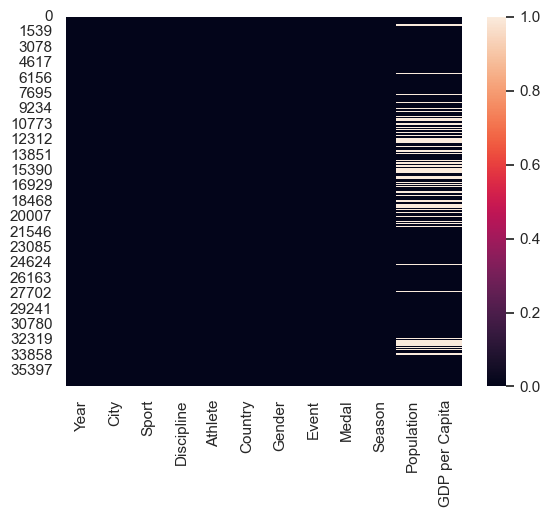

In [28]:
sns.heatmap(df_olympic.isna())
plt.show()

In [29]:
df_olympic[df_olympic['Population'].isna()]

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal,Season,Population,GDP per Capita
132,1896,Athens,Tennis,Tennis,Edwin Flack,ZZX,Men,Doubles,Bronze,Summer,NaN,NaN
133,1896,Athens,Tennis,Tennis,George Stuart Robertson,ZZX,Men,Doubles,Bronze,Summer,NaN,NaN
134,1896,Athens,Tennis,Tennis,John Boland,ZZX,Men,Doubles,Gold,Summer,NaN,NaN
135,1896,Athens,Tennis,Tennis,Friedrich Traun,ZZX,Men,Doubles,Gold,Summer,NaN,NaN
136,1896,Athens,Tennis,Tennis,Dionysios Kasdaglis,ZZX,Men,Doubles,Silver,Summer,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
33961,1992,Albertville,Skiing,Freestyle Skiing,Yelizaveta Kozhevnikova,EUN,Women,Moguls,Silver,Winter,NaN,NaN
33977,1992,Albertville,Skiing,Ski Jumping,Tomas Goder,TCH,Men,K120 Team (90M),Bronze,Winter,NaN,NaN
33978,1992,Albertville,Skiing,Ski Jumping,Frantisek Jez,TCH,Men,K120 Team (90M),Bronze,Winter,NaN,NaN
33979,1992,Albertville,Skiing,Ski Jumping,Jiri Parma,TCH,Men,K120 Team (90M),Bronze,Winter,NaN,NaN


In [30]:
df_olympic['Population'].fillna(df_olympic['Population'].mean(),inplace=True)
df_olympic['GDP per Capita'].fillna(df_olympic['GDP per Capita'].mean(),inplace=True)

In [31]:
df_olympic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36935 entries, 0 to 36934
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            36935 non-null  int64  
 1   City            36935 non-null  object 
 2   Sport           36935 non-null  object 
 3   Discipline      36935 non-null  object 
 4   Athlete         36935 non-null  object 
 5   Country         36935 non-null  object 
 6   Gender          36935 non-null  object 
 7   Event           36935 non-null  object 
 8   Medal           36935 non-null  object 
 9   Season          36935 non-null  object 
 10  Population      36935 non-null  float64
 11  GDP per Capita  36935 non-null  float64
dtypes: float64(2), int64(1), object(9)
memory usage: 3.4+ MB


### Outliers Analysis in Olympic Data

#### 1. Population Outliers Detection
- Used **Boxplot** to visualize outliers in the **Population** column.
- Calculated **IQR (Interquartile Range)** to identify outliers:
  - Q1: First quartile (25%)
  - Q3: Third quartile (75%)
  - IQR = Q3 - Q1
  - Values greater than: Q3 + 1.5 * IQR are considered outliers.

#### 2. GDP per Capita Outliers Detection
- Visualized outliers using **Boxplot** for the **GDP per Capita** column.
- Identified outliers using the same IQR method applied to **Population**.

#### 3. Relationship Between Population and Total Medals
- Created **Scatterplot** to show the relationship between population and total medals.
- Grouped data using **groupby** on the **Country** column.

#### 4. Medals Per Capita
- Converted the **Population** column to **Numeric** using **errors='coerce'** to handle non-numeric values as NaN.
- Calculated medals per capita with the formula:

  ```
  Medals_Per_Capita = Total_Medals / Population
  ```
- Filled missing values with **fillna(0)**.
- Visualized the relationship using **Scatterplot**.

#### 5. GDP per Capita Handling
- Converted the **GDP per Capita** column to **Numeric**.
- Filled missing values with the **Median**.
- Reset index using **reset_index(drop=True)**.

#### 6. Medals Per GDP
- Calculated medals per GDP using the formula:

  ```
  Medals_Per_GDP = Total_Medals / GDP per Capita
  ```
- Filled missing values with **fillna(0)**.
- Visualized the relationship using **Scatterplot** with purple color.

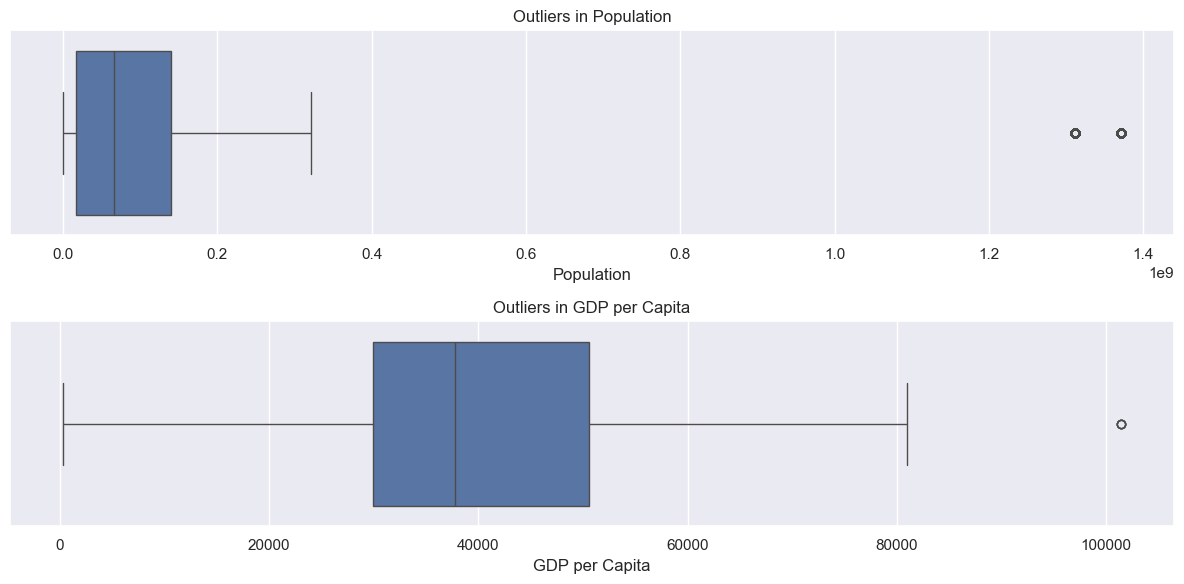

In [32]:

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
sns.boxplot(x=df_olympic['Population'])
plt.title('Outliers in Population')

# رسم GDP per Capita
plt.subplot(2, 1, 2)
sns.boxplot(x=df_olympic['GDP per Capita'])
plt.title('Outliers in GDP per Capita')

plt.tight_layout()
plt.show()


In [37]:
Q1 = df_olympic['Population'].quantile(0.25)
Q3 = df_olympic['Population'].quantile(0.75)
IQR = Q3 - Q1

outliers_population = df_olympic[(df_olympic['Population'] > Q3 + 1.5 * IQR)]
outliers_population[['Country', 'Population']]


,Country,Population
241,IND,1.311051e+09
244,IND,1.311051e+09
5512,IND,1.311051e+09
5513,IND,1.311051e+09
5514,IND,1.311051e+09
...,...,...
36675,CHN,1.371220e+09
36691,CHN,1.371220e+09
36718,CHN,1.371220e+09
36838,CHN,1.371220e+09


In [39]:
Q1_gdp = df_olympic['GDP per Capita'].quantile(0.25)
Q3_gdp = df_olympic['GDP per Capita'].quantile(0.75)
IQR_gdp = Q3_gdp - Q1_gdp

outliers_gdp = df_olympic[(df_olympic['GDP per Capita'] > Q3_gdp + 1.5 * IQR_gdp)]
outliers_gdp[['Country', 'GDP per Capita']]


,Country,GDP per Capita
4079,LUX,101449.968168
8130,LUX,101449.968168
33892,LUX,101449.968168
33904,LUX,101449.968168


In [46]:
medals_per_country = df_olympic.groupby('Country')['Medal'].count().reset_index()
medals_per_country.columns = ['Country', 'Total_Medals']
medals_per_country

,Country,Total_Medals
0,AFG,2
1,AHO,1
2,ALG,15
3,ANZ,29
4,ARG,259
...,...,...
143,VIE,2
144,YUG,442
145,ZAM,2
146,ZIM,23


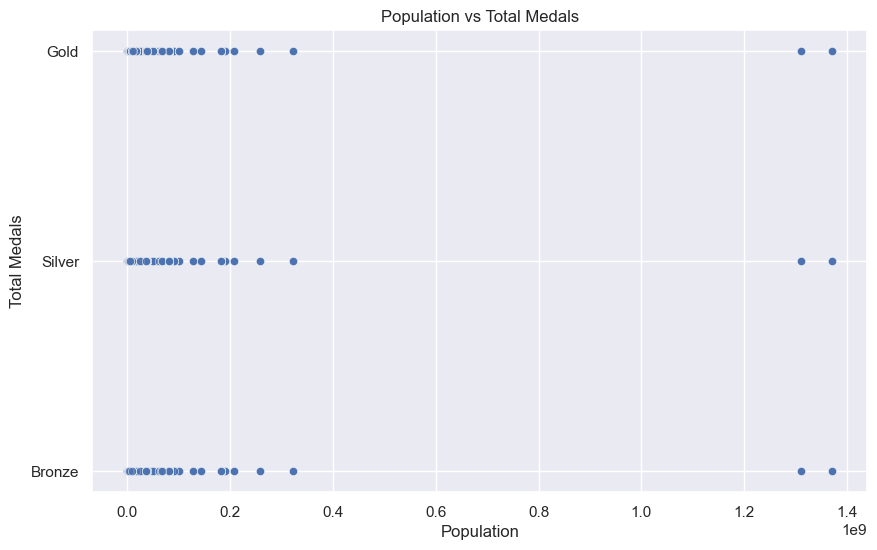

In [45]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Population', y='Medal', data=df_olympic, alpha=0.7)
plt.title('Population vs Total Medals')
plt.xlabel('Population')
plt.ylabel('Total Medals')
plt.show()


In [51]:
df_olympic['Population'] = pd.to_numeric(df_olympic['Population'], errors='coerce')
df_olympic['Total_Medals'] = pd.to_numeric(df_olympic['Medal'], errors='coerce')


In [52]:
df_olympic['Medals_Per_Capita'] = df_olympic['Total_Medals'] / df_olympic['Population']
df_olympic['Medals_Per_Capita'].fillna(0, inplace=True)


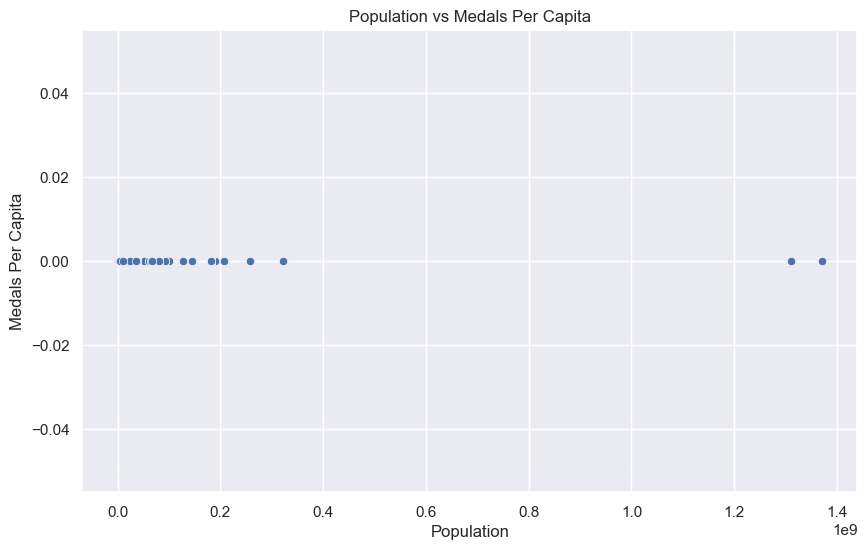

In [53]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_olympic, x='Population', y='Medals_Per_Capita')
plt.title('Population vs Medals Per Capita')
plt.xlabel('Population')
plt.ylabel('Medals Per Capita')
plt.show()


In [59]:
df_olympic['GDP per Capita'] = pd.to_numeric(df_olympic['GDP per Capita'], errors='coerce')

df_olympic['GDP per Capita'].fillna(df_olympic['GDP per Capita'].median(), inplace=True)
df_olympic.reset_index(drop=True, inplace=True)

df_olympic['GDP per Capita'].describe()


count     36935.000000
mean      37753.650089
std       17984.488824
min         277.068309
25%       29957.804315
50%       37753.650089
75%       50579.673649
max      101449.968168
Name: GDP per Capita, dtype: float64

<Figure size 1000x600 with 0 Axes>

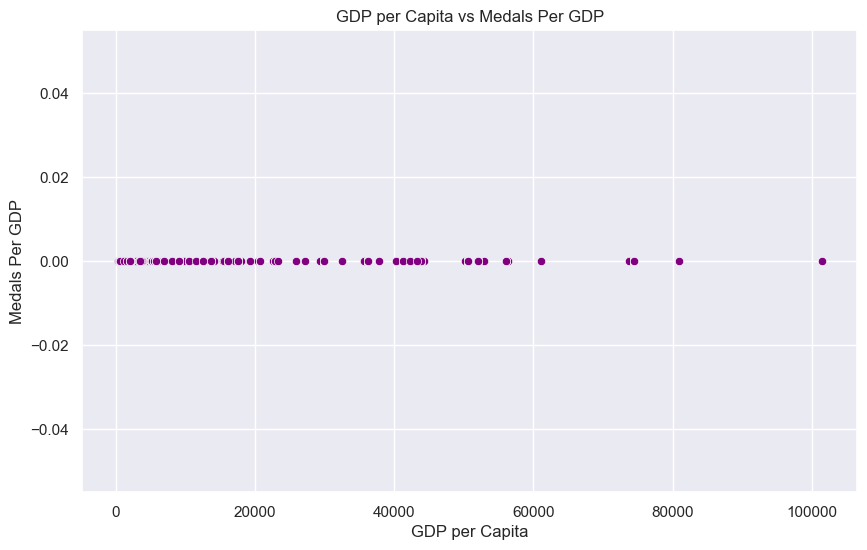

In [61]:
df_olympic['Medals_Per_GDP'] = df_olympic['Total_Medals'] / df_olympic['GDP per Capita']
df_olympic['Medals_Per_GDP'].fillna(0, inplace=True)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_olympic, x='GDP per Capita', y='Medals_Per_GDP', color='purple')
plt.title('GDP per Capita vs Medals Per GDP')
plt.xlabel('GDP per Capita')
plt.ylabel('Medals Per GDP')
plt.grid(True)
plt.show()
